# Индивидуальное задание. Первая часть

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('pic/Ind.jpg',0)
img_cntrs = cv2.imread('pic/Ind.jpg',1)
imag = cv2.imread('pic/Ind.jpg',0)

In [3]:
ret,thresh = cv2.threshold(img,0,255,0)
contours, hierarchy = cv2.findContours(thresh, 5, 5)

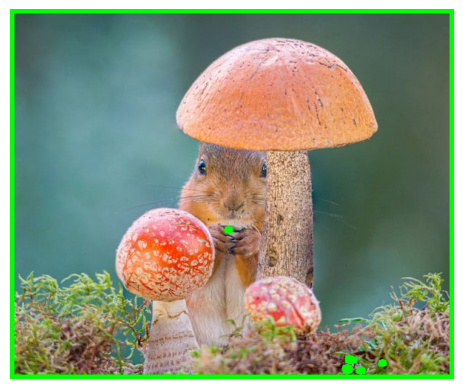

In [21]:
cv2.drawContours(img_cntrs, contours, -1, (0, 255 ,0), 3)
plt.imshow(img_cntrs[...,::-1])
plt.axis("off");

In [5]:
cnt = contours[0]

In [6]:
ar = cv2.contourArea(cnt)
print(ar)

298901.0


In [7]:
prm = cv2.arcLength(cnt,True)
print(prm)

2196.0


In [8]:
M = cv2.moments(cnt)
print(M)

{'m00': 298901.0, 'm10': 89520849.5, 'm01': 74575799.5, 'm20': 35748659233.666664, 'm11': 22335451950.25, 'm02': 24808882633.666664, 'm30': 16060085160724.75, 'm21': 8919290478799.834, 'm12': 7430260348783.167, 'm03': 9284724325649.75, 'mu20': 8937164808.416664, 'mu11': 0.0, 'mu02': 6202220658.416664, 'mu30': 0.001953125, 'mu21': 0.00146484375, 'mu12': 0.0009765625, 'mu03': 0.001953125, 'nu20': 0.1000334001336005, 'nu11': 0.0, 'nu02': 0.06942125765164159, 'nu30': 3.998633673696932e-17, 'nu21': 2.998975255272699e-17, 'nu12': 1.999316836848466e-17, 'nu03': 3.998633673696932e-17}


Получим высоту и ширину

In [9]:
x,y,w,h = cv2.boundingRect(cnt)
print(x,y,w,h)

0 0 600 500


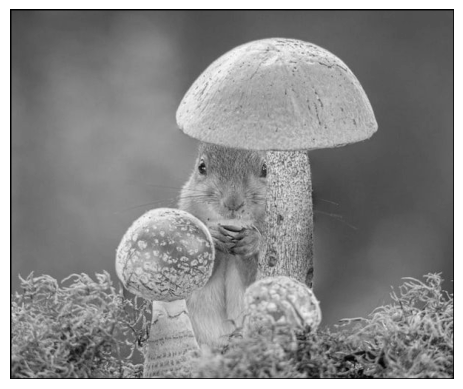

In [10]:
imag = cv2.rectangle(imag,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(imag, 'gray')
plt.axis('off');

Найдём отношение ширины к высоте

In [11]:
asprat = float(w) / h
print(asprat)

1.2


Найдём отношение площади контура к площади ограничивающего прямоугольника

In [12]:
rectar = w * h
extent = float(ar)/rectar
print(extent)

0.9963366666666666


Найдём эквивалентный диаметр:

In [13]:
eqdiam = np.sqrt(4*ar/np.pi)
print(eqdiam)

616.9056436448648


## Вторая часть

In [14]:
img = cv2. imread('pic/Cat.jpg',0)
ret,thresh = cv2.threshold(img,0,255,0)
contours, hierarchy = cv2.findContours(thresh, 5, 5)
cnt = contours[0]

Получим маску изображения

In [15]:
mask = np.zeros(img.shape, np.uint8)
cv2.drawContours(mask, [cnt], 0, 255, -1)
pixpoin = np.transpose(np.nonzero(mask))

Максимальное и минимальное значения и их координаты

In [16]:
minv, maxv, minl, maxl = cv2.minMaxLoc(img, mask=mask)

Найдём крайние точки изображения

In [17]:
leftmost = tuple(cnt[cnt[:, :, 0].argmin()][0])
rightmost = tuple(cnt[cnt[:, :, 0].argmax()][0])
topmost = tuple(cnt[cnt[:, :, 1].argmin()][0])
bottommost = tuple(cnt[cnt[:, :, 1].argmax()][0])

Средняя интенсивность

In [18]:
meanv = cv2.mean(img,mask = mask)

Ориентация – это угол, под которым направлено выделенное направление изображения. Найдём её

In [19]:
(x,y),(MA,ma),ang=cv2.fitEllipse(cnt)

In [20]:
print(pixpoin)
print(minv, maxv, minl, maxl)
print(leftmost, rightmost, topmost, bottommost)
print(meanv)
print(ang)

[[   0    0]
 [   0    1]
 [   0    2]
 ...
 [1458 2045]
 [1458 2046]
 [1458 2047]]
0.0 254.0 (1487, 1) (863, 450)
(0, 0) (2047, 0) (0, 0) (2047, 1458)
(96.02959434779684, 0.0, 0.0, 0.0)
179.81520080566406
